In [19]:
import rdkit
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.AtomPairs import Torsions
from rdkit import DataStructs

import pandas as pd

import utils

In [15]:
pep = ['VPAL','PALV']
smi = [utils.pep_seq_transform(i, 'SMILES') for i in pep]
mol = [utils.pep_seq_transform(i, '2d_mol') for i in pep]
fps = [MACCSkeys.GenMACCSKeys(m) for m in mol]

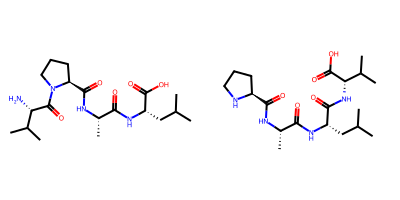

In [16]:
Chem.Draw.MolsToGridImage(
    mol,
    molsPerRow=2,
    subImgSize=(200, 200),
    legends=['' for x in mol]
)

In [17]:

sm01 = DataStructs.FingerprintSimilarity(fps[0], fps[1])

In [18]:
sm01

0.8541666666666666

In [22]:
df = pd.read_csv('625seq_to_test.csv')
pep = df['sequence'].values

smi = [utils.pep_seq_transform(i, 'SMILES') for i in pep]
mol = [utils.pep_seq_transform(i, '2d_mol') for i in pep]
fps = [MACCSkeys.GenMACCSKeys(m) for m in mol]

In [26]:
ls_same_fp = []
for i in range(len(pep)):
    sm = DataStructs.FingerprintSimilarity(fps[269], fps[i]) # pep[269] = 'VPAL'
    # print(f'The similarity between VPAL and {pep[i]}: {sm}')
    if sm == 1:
        ls_same_fp.append(i)
        print(f'{i}, {pep[i]}')

264, VPVL
269, VPAL
272, VPLV
273, VPLA
274, VPLL
304, VVPL
360, VLVP
429, AVPL
485, ALVP
552, LVPV
553, LVPA
554, LVPL
560, LVVP
585, LAVP
610, LLVP


In [31]:
ls_same_fp
mol_sub = [mol[i] for i in ls_same_fp]

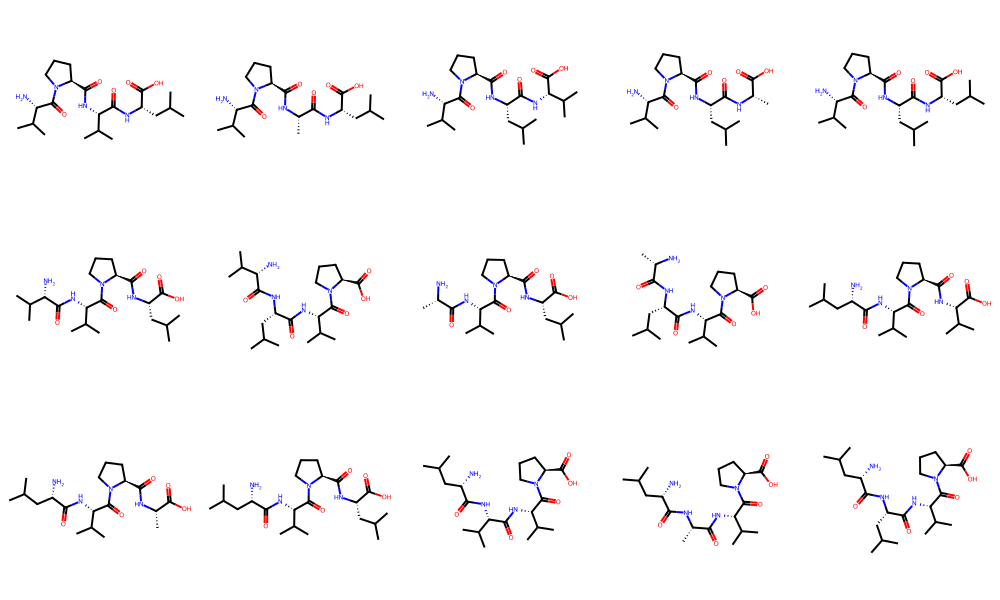

In [32]:
Chem.Draw.MolsToGridImage(
    mol_sub,
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=['' for x in mol_sub]
)